In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy.ndimage.filters import convolve
from skimage.morphology import binary_opening

from collections import Counter

import re

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalojanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tiger_image = imread("tiger.jpg")

In [4]:
tiger_image.dtype

dtype('uint8')

In [5]:
tiger_image.shape

(600, 580, 3)

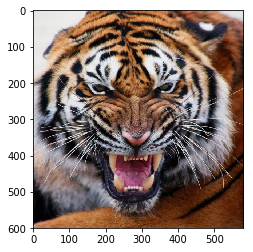

In [6]:
plt.imshow(tiger_image)
plt.show()

In [7]:
tiger_image[0, 0]

array([223, 224, 226], dtype=uint8)

In [8]:
tiger_image[:, 0]

array([[223, 224, 226],
       [223, 224, 226],
       [224, 225, 227],
       ...,
       [199, 161, 124],
       [186, 147, 106],
       [175, 133,  91]], dtype=uint8)

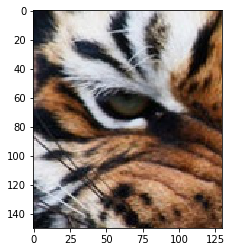

In [9]:
plt.imshow(tiger_image[150:300, 120:250])

In [10]:
red = tiger_image[:, :, 0]
blue = tiger_image[:, :, 1]
green = tiger_image[:, :, 2]

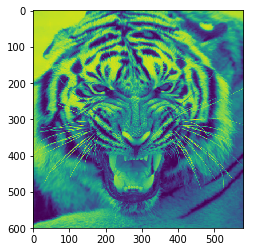

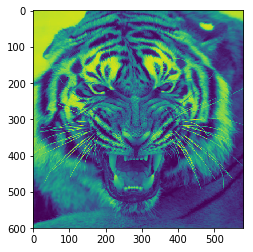

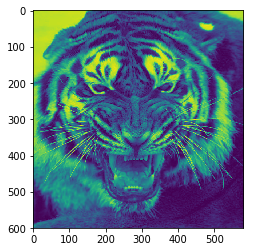

In [11]:
plt.imshow(red)
plt.show()
plt.imshow(blue)
plt.show()
plt.imshow(green)
plt.show()

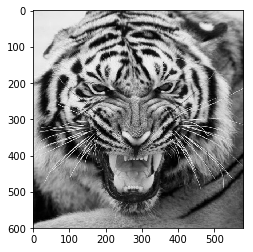

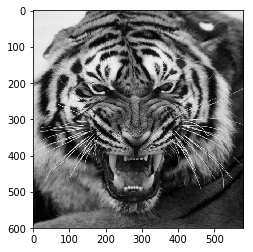

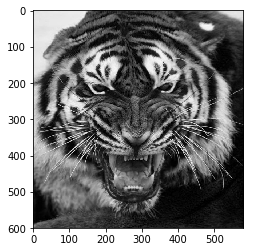

In [12]:
plt.imshow(red, cmap = "gray")
plt.show()
plt.imshow(blue, cmap = "gray")
plt.show()
plt.imshow(green, cmap = "gray")
plt.show()

In [13]:
(red + green + blue) / 3

array([[53.66666667, 53.66666667, 53.66666667, ..., 55.        ,
        55.        , 55.        ],
       [53.66666667, 53.66666667, 53.66666667, ..., 55.        ,
        55.        , 55.        ],
       [54.66666667, 54.66666667, 54.66666667, ..., 56.        ,
        56.        , 56.        ],
       ...,
       [76.        , 73.33333333, 72.        , ..., 46.        ,
        45.        , 45.        ],
       [61.        , 58.33333333, 55.        , ..., 49.        ,
        48.        , 48.        ],
       [47.66666667, 44.        , 39.66666667, ..., 50.        ,
        50.        , 49.        ]])

In [14]:
tiger_image.mean()

101.7728438697318

In [15]:
mean_image = tiger_image.mean(axis = 2)

In [16]:
tiger_image.mean(axis = 1).shape

(600, 3)

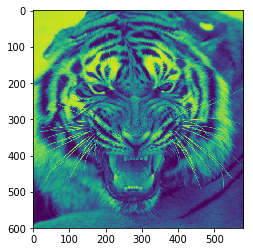

In [17]:
plt.imshow(mean_image)

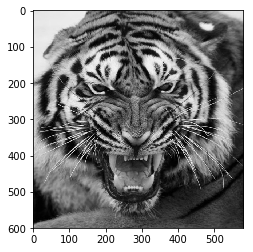

In [18]:
plt.imshow(mean_image, cmap = "gray")
plt.show()

In [19]:
tiger_grayscale = 0.299 * red + 0.587 * green + 0.114 * blue 

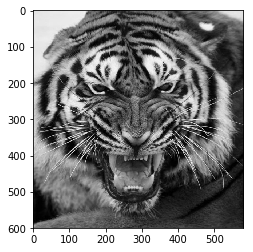

In [20]:
plt.imshow(tiger_grayscale, cmap="gray")
plt.show()

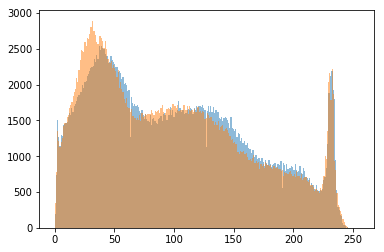

In [21]:
plt.hist(mean_image.ravel(), bins = 256, alpha = 0.5)
plt.hist(tiger_grayscale.ravel(), bins = 256, alpha = 0.5)
plt.show()

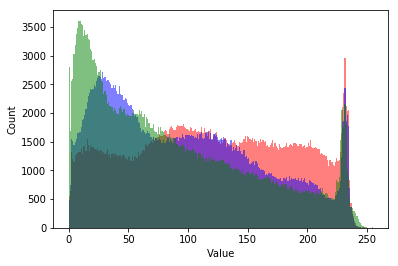

In [22]:
for channel, color_name in ([red, "red"], [blue, "blue"], [green, "green"]):
    plt.hist(channel.ravel(), bins = 256, alpha = 0.5, color = color_name)

plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

In [23]:
kernel = np.ones(shape = (3, 3)) / 9

In [24]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [25]:
convolution_result = convolve(tiger_grayscale, kernel)

In [26]:
convolution_result.min()

0.44444444444444436

In [27]:
convolution_result.max()

242.865

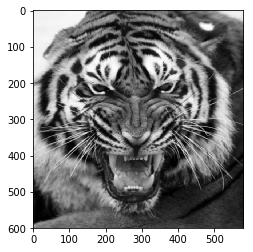

In [28]:
plt.imshow(convolution_result, cmap = "gray")
plt.show()

In [29]:
tiger_grayscale[tiger_grayscale < 100] = 0
tiger_grayscale[tiger_grayscale >= 100] = 1

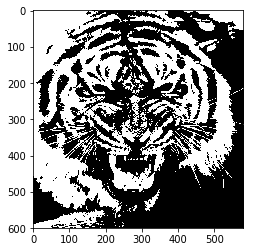

In [30]:
plt.imshow(tiger_grayscale, cmap="gray")
plt.show()

In [31]:
text = ""
with open("alice.txt", "r", encoding = "utf-8") as f:
    text = f.read()
print(len(text))

164108


In [32]:
print(text[:500])




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encodi


In [33]:
counter = Counter(text)

In [34]:
counter.most_common(20)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('c', 2843),
 ('g', 2766),
 ('w', 2725),
 (',', 2566),
 ('y', 2489),
 ('m', 2272),
 ('\n', 2266)]

In [35]:
word_counter = Counter(re.split("\W+", text))

In [36]:
word_counter.most_common(30)

[('the', 1693),
 ('and', 875),
 ('to', 802),
 ('a', 677),
 ('of', 609),
 ('I', 546),
 ('it', 543),
 ('she', 513),
 ('said', 458),
 ('in', 416),
 ('you', 408),
 ('Alice', 401),
 ('was', 357),
 ('that', 299),
 ('as', 256),
 ('her', 245),
 ('with', 223),
 ('at', 218),
 ('t', 217),
 ('s', 214),
 ('on', 200),
 ('all', 194),
 ('had', 178),
 ('be', 164),
 ('for', 161),
 ('not', 155),
 ('this', 154),
 ('or', 148),
 ('very', 140),
 ('but', 137)]

In [37]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
stop = set(stopwords.words("english"))
sentence = "this is a foo bar sentence"
print([w for w in sentence.lower().split() if w not in stop])

['foo', 'bar', 'sentence']


In [39]:
stemmer = PorterStemmer()

In [40]:
words = ["caresses", "flies", "dies", "seizing", "itemization", "sensational", "traditional", "reference", "plotted"]
print([stemmer.stem(word) for word in words])

['caress', 'fli', 'die', 'seiz', 'item', 'sensat', 'tradit', 'refer', 'plot']


In [41]:
newsgroups = fetch_20newsgroups()

In [42]:
tfidf = TfidfVectorizer(input = "content", analyzer = "word",
    ngram_range = (1, 4), min_df = 0, stop_words = stop, sublinear_tf = True)
tfidf_matrix = tfidf.fit_transform(newsgroups.data)

In [43]:
newsgroups

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [44]:
tfidf_matrix

<11314x4264838 sparse matrix of type '<class 'numpy.float64'>'
	with 7309620 stored elements in Compressed Sparse Row format>

In [45]:
feature_names = tfidf.get_feature_names()

In [46]:
feature_names

['00',
 '00 00',
 '00 00 00',
 '00 00 00 00',
 '00 00 00 0020',
 '00 00 00 01',
 '00 00 00 10',
 '00 00 00 75',
 '00 00 00 baltimore',
 '00 00 00 chicago',
 '00 00 00 colorado',
 '00 00 00 gmt',
 '00 00 00 kansas',
 '00 00 00 minnesota',
 '00 00 00 new',
 '00 00 00 philadelphia',
 '00 00 00 print',
 '00 00 00 punisher',
 '00 00 00 request',
 '00 00 00 san',
 '00 00 00 seattle',
 '00 00 00 st',
 '00 00 00 texas',
 '00 00 00 toronto',
 '00 00 00 utc',
 '00 00 000',
 '00 00 000 00',
 '00 00 0020',
 '00 00 0020 50',
 '00 00 01',
 '00 00 01 00',
 '00 00 01 american',
 '00 00 01 edt',
 '00 00 01 houston',
 '00 00 01 national',
 '00 00 01 yesterday',
 '00 00 0500',
 '00 00 0500 possible',
 '00 00 0500 posting',
 '00 00 10',
 '00 00 10 00',
 '00 00 11',
 '00 00 11 00',
 '00 00 1993',
 '00 00 1993 lines',
 '00 00 28',
 '00 00 28 8a',
 '00 00 37',
 '00 00 37 48',
 '00 00 3c',
 '00 00 3c 06',
 '00 00 50',
 '00 00 50 10',
 '00 00 75',
 '00 00 75 00',
 '00 00 american',
 '00 00 american east',
 '00

In [47]:
doc = 0 # Change the index to view another document
feature_index = tfidf_matrix[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

lerxst 0.11709719584362484
wam 0.08594739738242584
umd 0.07011504284015369
edu 0.018073903284240023
thing 0.024291659394676757
subject 0.007488624935363378
car 0.07779811248049708
nntp 0.013944622636260482
posting 0.013475338841501096
host 0.013846527175808492
rac3 0.06281439431651958
organization 0.007790465851735537
university 0.014497419632135767
maryland 0.04275189884577357
college 0.030496622820934884
park 0.03875235542409538
lines 0.007513152830757154
15 0.0247550210858457
wondering 0.03472318923857122
anyone 0.03401569299965141
could 0.01935804469111883
enlighten 0.05243295579608353
saw 0.03308236729202159
day 0.02588509473181963
door 0.03915007498625421
sports 0.042254840849386535
looked 0.03532469348249766
late 0.0360384356715743
60s 0.05533678642067018
early 0.03304210577065753
70s 0.054238927988226
called 0.027007372615039098
bricklin 0.0653341086977387
doors 0.04536023704162452
really 0.02215137060528733
small 0.029420232033202993
addition 0.03727312003577782
front 0.033802

In [48]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [49]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [50]:
burger = imread("http://lab.students.softuni.bg/assets/courseware/v1/692dbe85139f974150d80f57becfe093/asset-v1:SoftUni+DS101+June-2019+type@asset+block/hamburger.jpg")

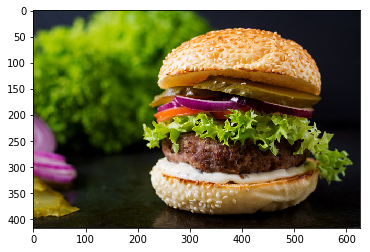

In [51]:
plt.imshow(burger)
plt.show()

In [52]:
burger.shape

(417, 626, 3)

In [53]:
result = 417 * 626 * 3

In [54]:
result

783126

In [55]:
red = burger[:, :, 0]
blue = burger[:, :, 1]
green = burger[:, :, 2]

In [56]:
red.mean()

90.08790156373304

In [57]:
blue.mean()

84.07082002129926

In [58]:
green.mean()

36.792577439645726

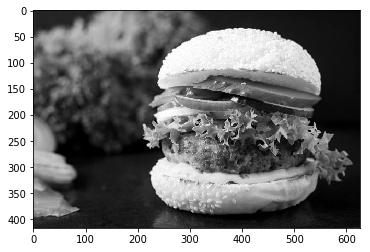

In [59]:
plt.imshow(red, cmap="gray")
plt.draw()

In [60]:
blue_opening = binary_opening(blue)

In [61]:
blue_opening.shape

(417, 626)

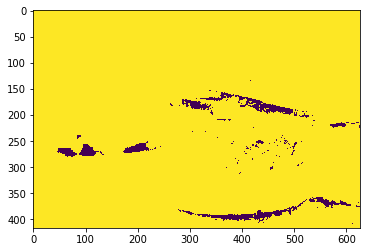

In [62]:
plt.imshow(blue_opening)

In [63]:
blue_opening

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [64]:
kernel = np.ones(shape = (3, 3)) / 9

In [65]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [66]:
blue_opening = binary_opening(blue, selem=kernel)

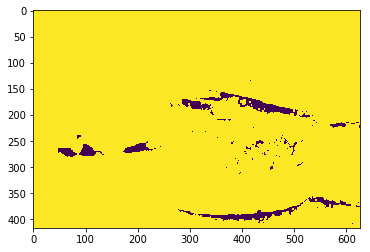

In [67]:
plt.imshow(blue_opening)

In [68]:
int_arr_blue_opening = blue_opening.astype(int)

In [69]:
int_arr_blue_opening

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

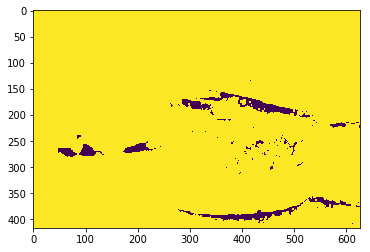

In [70]:
plt.imshow(int_arr_blue_opening)

In [71]:
np.count_nonzero(int_arr_blue_opening)

253193

In [72]:
int_arr_blue_opening.shape

(417, 626)

In [73]:
417 * 626

261042

In [74]:
261042 - 146416

114626

In [75]:
text = ""
with open("pride.txt", "r", encoding = "utf-8") as f:
    text = f.read()
print(len(text))

704189


In [76]:
print(text[:500])

The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last Updated: March 10, 2018

Language: English

Character set 


In [77]:
counter = Counter(text)

In [78]:
counter.most_common(20)

[(' ', 113941),
 ('e', 70344),
 ('t', 47283),
 ('a', 42156),
 ('o', 41138),
 ('n', 38431),
 ('i', 36273),
 ('h', 33883),
 ('r', 33293),
 ('s', 33292),
 ('d', 22247),
 ('l', 21282),
 ('u', 15439),
 ('\n', 13426),
 ('m', 13401),
 ('c', 13397),
 ('y', 12653),
 ('f', 12177),
 ('w', 11922),
 ('g', 10161)]

In [79]:
word_counter = Counter(re.split("\W+", text.lower()))

In [80]:
word_counter.most_common(30)

[('the', 4507),
 ('to', 4242),
 ('of', 3729),
 ('and', 3658),
 ('her', 2203),
 ('i', 2066),
 ('a', 2011),
 ('in', 1937),
 ('was', 1844),
 ('she', 1695),
 ('that', 1556),
 ('it', 1550),
 ('not', 1442),
 ('you', 1397),
 ('he', 1327),
 ('be', 1259),
 ('his', 1258),
 ('as', 1191),
 ('had', 1173),
 ('with', 1099),
 ('for', 1086),
 ('but', 1007),
 ('is', 883),
 ('have', 845),
 ('at', 802),
 ('mr', 785),
 ('him', 753),
 ('on', 726),
 ('my', 704),
 ('s', 660)]

In [81]:
pride = word_counter['pride']

In [82]:
pride

53

In [83]:
prejudice = word_counter['prejudice']

In [84]:
prejudice

11

In [85]:
word_counter.most_common(3)

[('the', 4507), ('to', 4242), ('of', 3729)]

In [86]:
stop = set(stopwords.words("english"))
final = Counter()
for w in word_counter:
    if w not in stop:
        if final[w] == 0:
            final[w] = 1
        else:
            final[w] += 1


In [87]:
final.most_common(30)

[('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('pride', 1),
 ('prejudice', 1),
 ('jane', 1),
 ('austen', 1),
 ('use', 1),
 ('anyone', 1),
 ('anywhere', 1),
 ('cost', 1),
 ('almost', 1),
 ('restrictions', 1),
 ('whatsoever', 1),
 ('may', 1),
 ('copy', 1),
 ('give', 1),
 ('away', 1),
 ('terms', 1),
 ('license', 1),
 ('included', 1),
 ('online', 1),
 ('www', 1),
 ('org', 1),
 ('title', 1),
 ('author', 1),
 ('posting', 1),
 ('date', 1),
 ('august', 1),
 ('26', 1)]